<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/03_Exploratory_Data_Analysis/04_Distribution_and_Outlier_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [5]:
# Step 2: Create Sample Dataset
np.random.seed(42)
data = {
    'Age': np.random.normal(35, 10, 200).astype(int),
    'Salary': np.random.normal(70000, 20000, 200).astype(int),
    'Purchase_Amount': np.append(
        np.random.normal(5000, 1500, 194),
        [25000, 27000, 30000, 35000, 40000, 45000]
    )  # total now 200
}

df = pd.DataFrame(data)
df.head()


,Age,Salary,Purchase_Amount
0,39,77155,2608.358512
1,33,81215,4100.937466
2,41,91661,5007.865550
3,50,91076,5070.470891
4,32,42446,4324.901793


In [6]:
# Step 3: Check Basic Statistics
print(df.describe())

              Age         Salary  Purchase_Amount
count  200.000000     200.000000       200.000000
mean    34.050000   71716.890000      5737.428257
std      9.343662   19740.086567      5288.121143
min      8.000000    5174.000000      1292.533250
25%     27.000000   57882.750000      3844.006137
50%     34.500000   71576.500000      4937.800357
75%     39.250000   83744.250000      5951.351771
max     62.000000  147054.000000     45000.000000


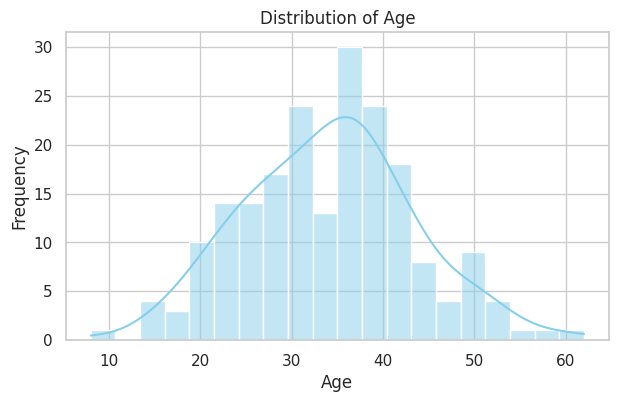

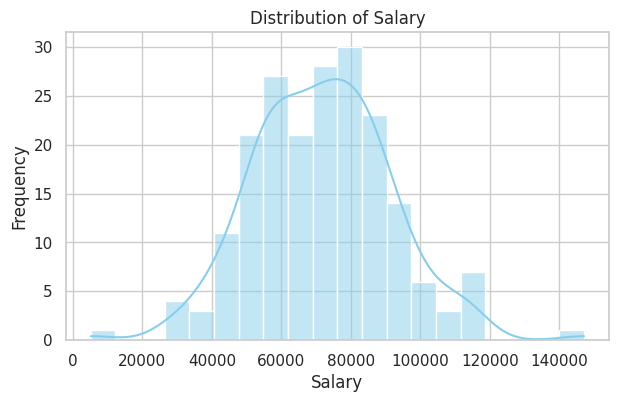

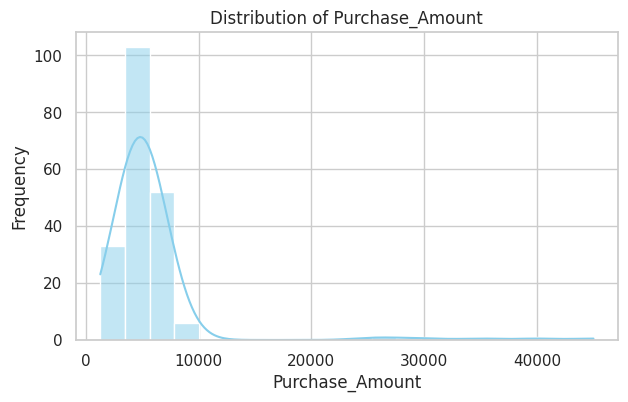

In [7]:
# Step 4: Visualize Distribution (Histogram + KDE)
for col in ['Age', 'Salary', 'Purchase_Amount']:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

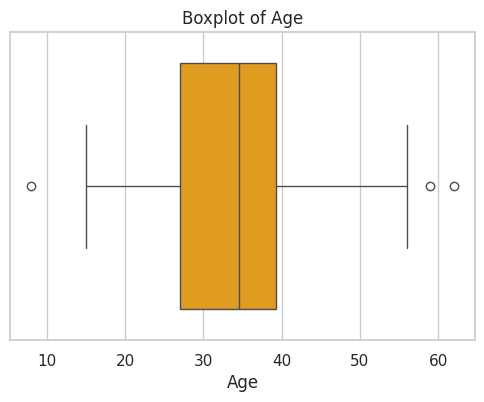

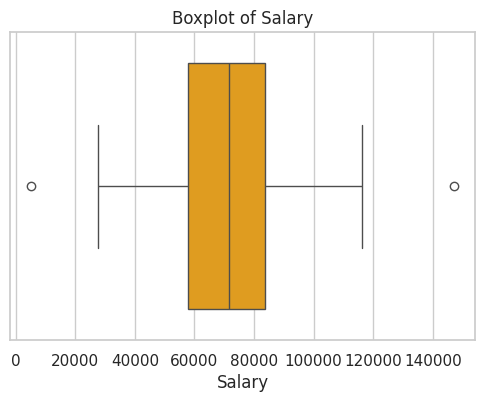

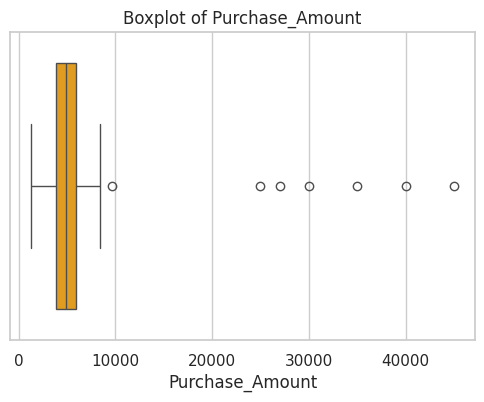

In [8]:
# Step 5: Visualize Outliers using Boxplots
for col in ['Age', 'Salary', 'Purchase_Amount']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
# Step 6: Detect Outliers using IQR Method
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column} → {len(outliers)} outliers detected")
    return outliers

for col in ['Age', 'Salary', 'Purchase_Amount']:
    detect_outliers_iqr(col)

Age → 3 outliers detected
Salary → 2 outliers detected
Purchase_Amount → 7 outliers detected


In [10]:
# Step 7: Detect Outliers using Z-Score Method
z_scores = np.abs(stats.zscore(df[['Age', 'Salary', 'Purchase_Amount']]))
outliers_z = np.where(z_scores > 3)  # threshold = 3
print(f"\nTotal Z-Score Outliers Detected: {len(set(outliers_z[0]))}")


Total Z-Score Outliers Detected: 8


In [11]:
# Step 8: Remove Outliers (using IQR)
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

df_cleaned = remove_outliers_iqr(df, 'Purchase_Amount')
print("Original shape:", df.shape)
print("After removing Purchase_Amount outliers:", df_cleaned.shape)


Original shape: (200, 3)
After removing Purchase_Amount outliers: (193, 3)


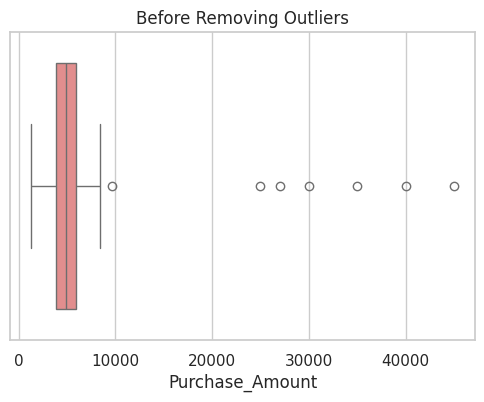

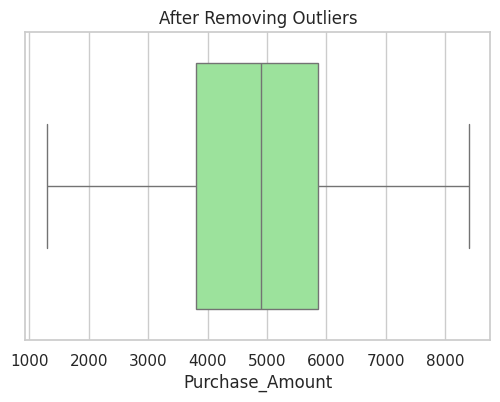

In [12]:
# Step 9: Compare Before vs After
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Purchase_Amount'], color='lightcoral')
plt.title("Before Removing Outliers")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df_cleaned['Purchase_Amount'], color='lightgreen')
plt.title("After Removing Outliers")
plt.show()
